In [1]:
# 使用 pip 在当前 Jupyter Notebook 环境中安装缺失的库
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 12.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# 数据加载
data = pd.read_csv('updated_extracted_tweet_data (1).csv')  

# 时间特征处理
data['CreatedAt'] = pd.to_datetime(data['CreatedAt'], unit='s')
data['hour'] = data['CreatedAt'].dt.hour
data['day_of_week'] = data['CreatedAt'].dt.dayofweek

# 类别特征处理
sentiment_ohe = OneHotEncoder()
sentiments = sentiment_ohe.fit_transform(data[['Sentiment']]).toarray()
sentiment_columns = sentiment_ohe.get_feature_names_out(['Sentiment'])
sentiment_df = pd.DataFrame(sentiments, columns=sentiment_columns)

# 合并处理过的特征
data = pd.concat([data, sentiment_df], axis=1)

# 丢弃原始的类别特征和时间戳
data.drop(['CreatedAt', 'Sentiment'], axis=1, inplace=True)

# 目标变量和特征分离
X = data.drop('price', axis=1)
y = data['price']

# 数据规范化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 为LSTM调整数据形状
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# 创建模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
130/130 - 24s - 182ms/step - loss: 0.1121 - val_loss: 0.0220
Epoch 2/100
130/130 - 4s - 31ms/step - loss: 0.0230 - val_loss: 0.0191
Epoch 3/100
130/130 - 4s - 30ms/step - loss: 0.0209 - val_loss: 0.0177
Epoch 4/100
130/130 - 4s - 30ms/step - loss: 0.0197 - val_loss: 0.0184
Epoch 5/100
130/130 - 4s - 30ms/step - loss: 0.0200 - val_loss: 0.0171
Epoch 6/100
130/130 - 4s - 30ms/step - loss: 0.0188 - val_loss: 0.0171
Epoch 7/100
130/130 - 4s - 30ms/step - loss: 0.0188 - val_loss: 0.0169
Epoch 8/100
130/130 - 4s - 30ms/step - loss: 0.0175 - val_loss: 0.0166
Epoch 9/100
130/130 - 4s - 30ms/step - loss: 0.0177 - val_loss: 0.0164
Epoch 10/100
130/130 - 4s - 30ms/step - loss: 0.0172 - val_loss: 0.0162
Epoch 11/100
130/130 - 4s - 30ms/step - loss: 0.0168 - val_loss: 0.0159
Epoch 12/100
130/130 - 4s - 30ms/step - loss: 0.0164 - val_loss: 0.0158
Epoch 13/100
130/130 - 4s - 30ms/step - loss: 0.0162 - val_loss: 0.0158
Epoch 14/100
130/130 - 4s - 30ms/step - loss: 0.0159 - val_loss: 0.0157

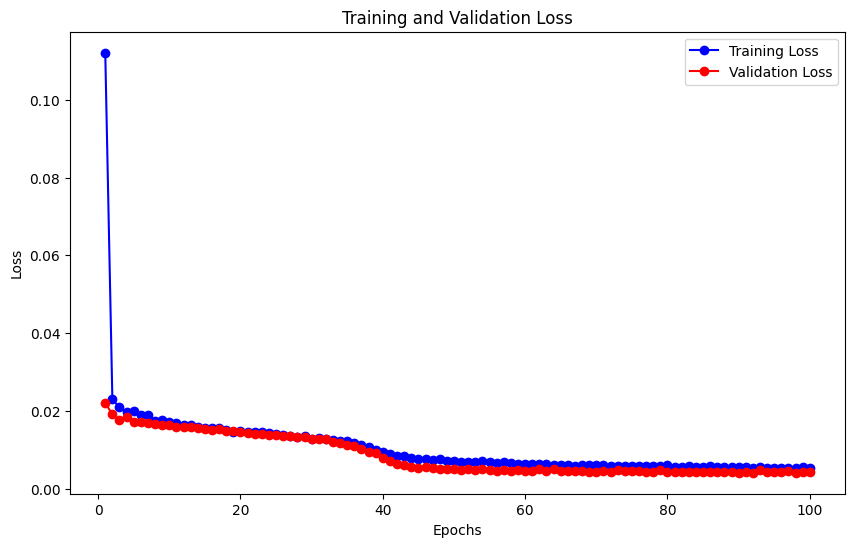

In [8]:
import matplotlib.pyplot as plt

# 假设 history 是使用 model.fit() 返回的历史记录对象
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig('training_validation_loss.png')  # 保存图像用于论文
plt.show()


In [9]:
# 使用模型进行预测
y_pred = model.predict(X_test)

# 如果目标变量经过了缩放，需要将预测结果和实际结果反向缩放回原始比例
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


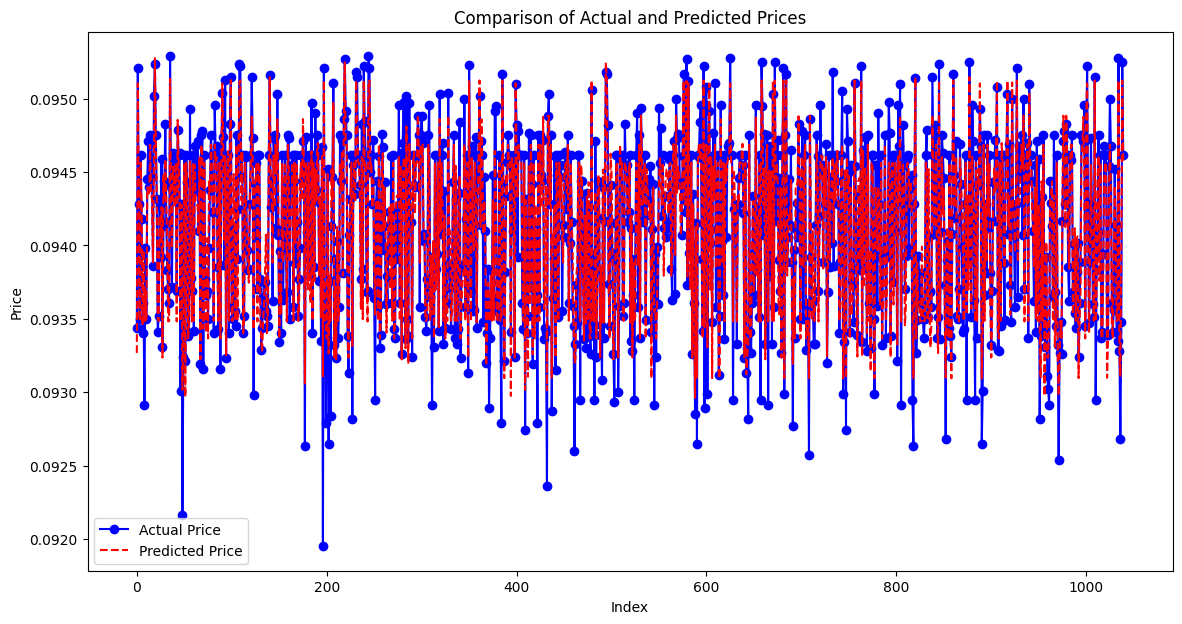

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 假设已经有 y_pred_rescaled 和 y_test_rescaled
# 我们直接使用索引作为 X 轴
indices = np.arange(len(y_test_rescaled))

plt.figure(figsize=(14, 7))
plt.plot(indices, y_test_rescaled, label='Actual Price', color='blue', marker='o')
plt.plot(indices, y_pred_rescaled, label='Predicted Price', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [12]:
import pandas as pd

# 加载 CSV 文件
data = pd.read_csv('updated_extracted_tweet_data (1).csv')  # 确保文件路径正确

# 打印所有列名
print(data.columns)

Index(['CreatedAt', 'Replies', 'Favorites', 'Impressions', 'Sentiment',
       'UserValue', 'TweetValue', 'InfluenceScore', 'price'],
      dtype='object')


In [13]:
# 假设除了 'price' 外的所有列都是特征
feature_names = [col for col in data.columns if col != 'price']
print("Feature names:", feature_names)


Feature names: ['CreatedAt', 'Replies', 'Favorites', 'Impressions', 'Sentiment', 'UserValue', 'TweetValue', 'InfluenceScore']


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 X_test 是你的测试数据集
sample = X_test[0:1]  # 选择第一个样本进行分析
original_prediction = model.predict(sample)  # 获取原始预测


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [16]:
# 假设 X_train 是你的输入特征数据
feature_names = ['Feature' + str(i+1) for i in range(X_train.shape[2])]


In [18]:
print("Number of feature names:", len(feature_names))
print("Number of feature impacts:", len(features_impact))


Number of feature names: 12
Number of feature impacts: 12


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# 数据加载
data = pd.read_csv('updated_extracted_tweet_data (1).csv')

# 时间特征处理
data['CreatedAt'] = pd.to_datetime(data['CreatedAt'], unit='s')
data['hour'] = data['CreatedAt'].dt.hour
data['day_of_week'] = data['CreatedAt'].dt.dayofweek

# 类别特征处理
sentiment_ohe = OneHotEncoder()
sentiments = sentiment_ohe.fit_transform(data[['Sentiment']]).toarray()
sentiment_columns = sentiment_ohe.get_feature_names_out(['Sentiment'])
sentiment_df = pd.DataFrame(sentiments, columns=sentiment_columns)

# 合并处理过的特征
data = pd.concat([data, sentiment_df], axis=1)

# 丢弃原始的类别特征和时间戳
data.drop(['CreatedAt', 'Sentiment'], axis=1, inplace=True)

# 目标变量和特征分离
X = data.drop('price', axis=1)
y = data['price']

# 数据规范化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 为LSTM调整数据形状
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# 创建模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Increased dropout rate
model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Increased dropout rate
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# 预测
predictions = model.predict(X_test)

# 应用指数平滑
def exponential_smoothing(series, alpha=0.3):
    result = [series[0]]  # 第一个值作为初始值
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

smoothed_predictions = exponential_smoothing(predictions.flatten())

# 可能需要将平滑后的预测再次缩放回原始比例（如果进行了缩放的话）
smoothed_predictions_rescaled = scaler.inverse_transform(smoothed_predictions.reshape(-1, 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
130/130 - 15s - 112ms/step - loss: 0.5299 - val_loss: 0.1179
Epoch 2/100
130/130 - 3s - 20ms/step - loss: 0.0684 - val_loss: 0.0425
Epoch 3/100
130/130 - 3s - 21ms/step - loss: 0.0419 - val_loss: 0.0358
Epoch 4/100
130/130 - 3s - 20ms/step - loss: 0.0377 - val_loss: 0.0345
Epoch 5/100
130/130 - 3s - 20ms/step - loss: 0.0368 - val_loss: 0.0343
Epoch 6/100
130/130 - 3s - 20ms/step - loss: 0.0367 - val_loss: 0.0341
Epoch 7/100
130/130 - 3s - 21ms/step - loss: 0.0366 - val_loss: 0.0342
Epoch 8/100
130/130 - 3s - 20ms/step - loss: 0.0366 - val_loss: 0.0340
Epoch 9/100
130/130 - 3s - 20ms/step - loss: 0.0363 - val_loss: 0.0346
Epoch 10/100
130/130 - 3s - 20ms/step - loss: 0.0359 - val_loss: 0.0342
Epoch 11/100
130/130 - 3s - 21ms/step - loss: 0.0361 - val_loss: 0.0340
Epoch 12/100
130/130 - 3s - 21ms/step - loss: 0.0363 - val_loss: 0.0340
Epoch 13/100
130/130 - 3s - 21ms/step - loss: 0.0360 - val_loss: 0.0343
Epoch 14/100
130/130 - 3s - 21ms/step - loss: 0.0357 - val_loss: 0.0340

AttributeError: 'list' object has no attribute 'reshape'